# Import Model and Data in loaders

In [1]:
import os
from pathlib import Path
p = Path.cwd().resolve()
while p != p.parent and not (p / 'requirements.txt').exists() and not (p / 'data').exists():
    p = p.parent

os.chdir(str(p/"src"))


# Plotting Loss and Accuracies

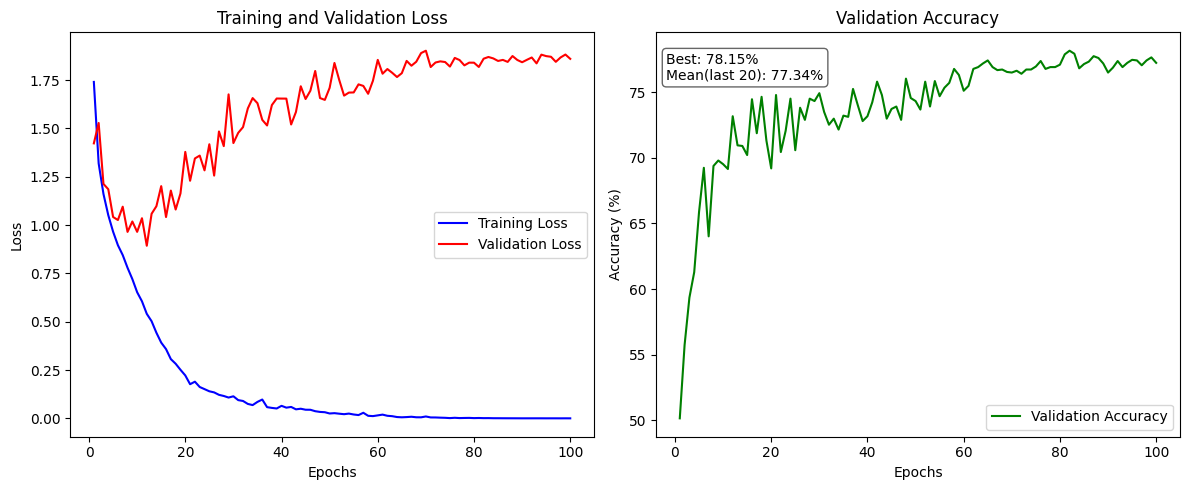

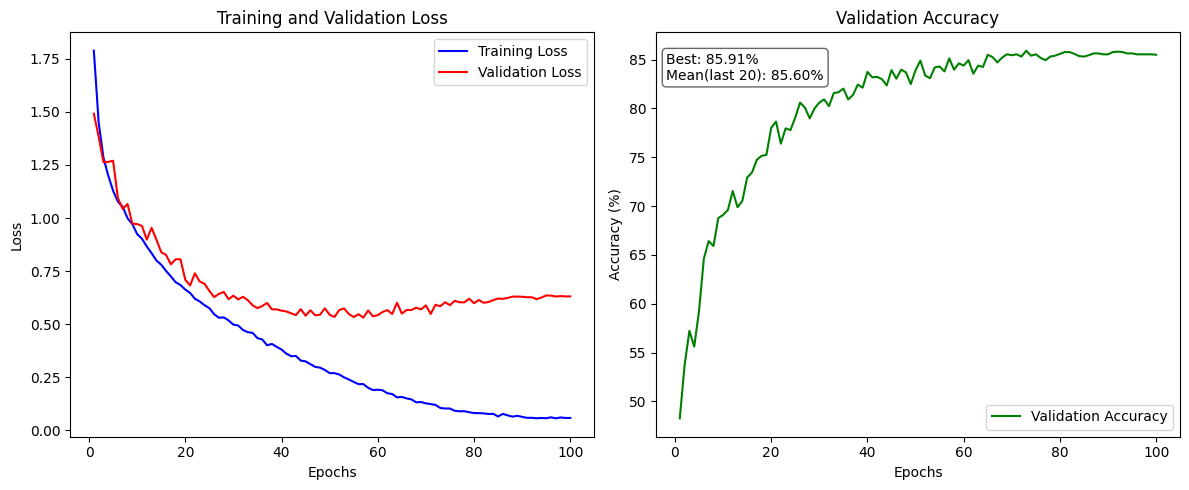

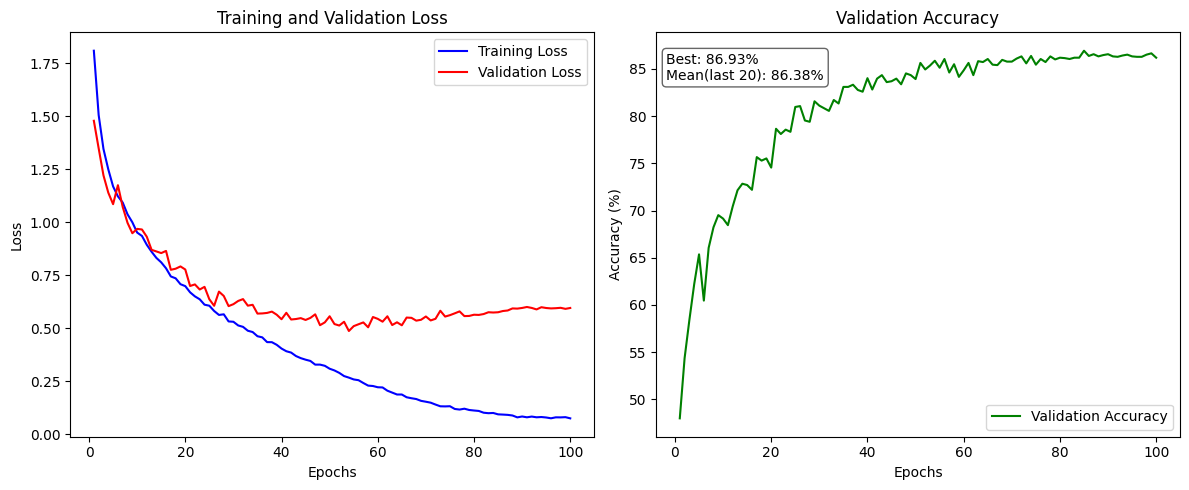

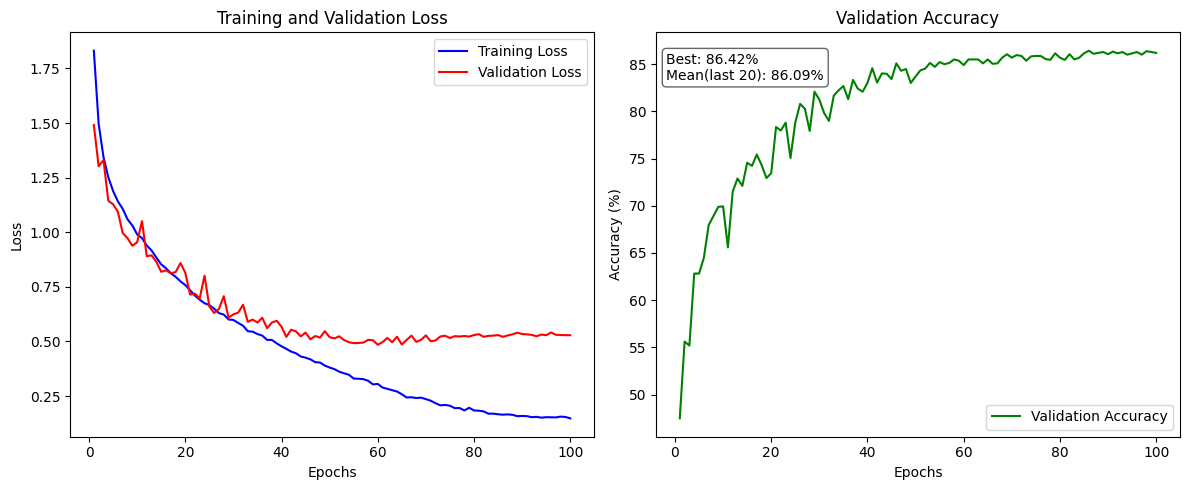

In [2]:
from utils import plot_from_csv

plot_from_csv(source='../experiments/logs/training_log_Tier0.csv', dest='../plots/aug_tier_0.png')
plot_from_csv(source='../experiments/logs/training_log_Tier1.csv', dest='../plots/aug_tier_1.png')
plot_from_csv(source='../experiments/logs/training_log_Tier2.csv', dest='../plots/aug_tier_2.png')
plot_from_csv(source='../experiments/logs/training_log_Tier3.csv', dest='../plots/aug_tier_3.png')



In [3]:
from eval import evaluateClassAccuracy
from model import build_model
import torch
from data import build_dataloaders

# build dataloaders (match augmentation tier & size that was used for training)
p = Path.cwd().resolve().parent  # adjust as needed
train_loader, val_loader, test_loader, meta = build_dataloaders(data_root=str(p/'data'), size=128, batch_size=64, augmentationTier=0, seed=67)


for i in range(4):
    print(f"Final Evaluation on Test Set (Tier{i}):")
    ckpt_path = f"../experiments/checkpoints/model_epoch_best_Tier{i}.pth"
    model = build_model(name="small_cnn", num_classes=len(meta["class_names"]))
    checkpoint = torch.load(ckpt_path, map_location="cpu")
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()
    evaluateClassAccuracy(model, test_loader, torch.nn.CrossEntropyLoss())

Discovered 21710 samples in 10 classes.
Augmentation Tier 0 - Train/val/test split: 17380/2165/2165
Final Evaluation on Test Set (Tier0):


KeyboardInterrupt: 